In [2]:
pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/2e/f3/19da7511b45e80216cbbd9467137b2d28919c58ba1ccb971435cb631e470/keras-2.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 119.1 kB/s eta 0:00:15
    --------------------------------------- 0.0/1.7 MB 119.1 kB/s eta 0:00:15
   - -------------------------------------- 0.1/1.7 MB 182.2 kB/s eta 0:00:10
   - -------------------------------------- 0.1/1.7 MB 218.6 kB/s eta 0:00:08
   - -------------------------------------- 0.1/1.7 MB 218.6 kB/s eta 0:00:08
   -- ------------------------------------- 0.1/1.7 MB 288.1 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.7 MB 288.1

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
pip install tensorflow

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
dataSet = pd.read_csv("MSFT.csv")
dataSet.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-16,46.009998,46.689999,45.970001,46.660000,41.087555,26271700
1,2015-07-17,46.549999,46.779999,46.259998,46.619999,41.052341,29467100
2,2015-07-20,46.650002,47.130001,46.439999,46.919998,41.316509,30631900
3,2015-07-21,46.779999,47.330002,46.480000,47.279999,41.633511,42781900
4,2015-07-22,45.439999,46.930000,45.200001,45.540001,40.101318,59152400
5,2015-07-23,45.270000,46.230000,45.099998,46.110001,40.603237,33934000
6,2015-07-24,45.910000,46.320000,45.799999,45.939999,40.453545,32333200
7,2015-07-27,45.939999,46.009998,45.250000,45.349998,39.934006,39701400
8,2015-07-28,45.580002,45.639999,44.790001,45.340000,39.925201,34328900
9,2015-07-29,45.400002,46.779999,45.259998,46.290001,40.761749,40945900


In [14]:
Train = dataSet.iloc[:800,1:2].values
Test = dataSet.iloc[800:,1:2].values

In [15]:
Sc = MinMaxScaler(feature_range=(0,1))
training_scaled = Sc.fit_transform(Train)

In [16]:
Xtrain=[]
Ytrain=[]
for i in range(60,800):
    Xtrain.append(training_scaled[i-60:i,0])
    Ytrain.append(training_scaled[i,0])
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)
Xtrain = np.reshape(Xtrain,(Xtrain.shape[0],Xtrain.shape[1],1))

In [17]:
lstm = Sequential()
lstm.add(LSTM(units=50,return_sequences = True,input_shape=(Xtrain.shape[1],1)))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50,return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50,return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.2))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam',loss='mean_squared_error')
lstm.fit(Xtrain,Ytrain,epochs=100,batch_size=32)

Epoch 1/100
24/24 [==============================] - 8s 57ms/step - loss: 0.0467
Epoch 2/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0047
Epoch 3/100
24/24 [==============================] - 1s 58ms/step - loss: 0.0040
Epoch 4/100
24/24 [==============================] - 1s 59ms/step - loss: 0.0040
Epoch 5/100
24/24 [==============================] - 1s 59ms/step - loss: 0.0041
Epoch 6/100
24/24 [==============================] - 1s 60ms/step - loss: 0.0030
Epoch 7/100
24/24 [==============================] - 2s 63ms/step - loss: 0.0028
Epoch 8/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0032
Epoch 9/100
24/24 [==============================] - 1s 58ms/step - loss: 0.0032
Epoch 10/100
24/24 [==============================] - 1s 57ms/step - loss: 0.0026
Epoch 11/100
24/24 [==============================] - 1s 59ms/step - loss: 0.0030
Epoch 12/100
24/24 [==============================] - 1s 59ms/step - loss: 0.0031
Epoch 13/100
24/24 [=====

In [19]:
dataTrain = dataSet.iloc[:800,1:2]
dataTest = dataSet.iloc[800:,1:2]
dataTotal = pd.concat((dataTrain,dataTest),axis=0)
totalInput = dataTotal[len(dataTotal)-len(dataTest)-60:].values
totalInput = totalInput.reshape(-1,1)
totalInput = Sc.transform(totalInput)
X_test=[]
for i in range(60,519):
    X_test.append(totalInput[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

predicted_price = lstm.predict(X_test)
predicted_price = Sc.inverse_transform(predicted_price)

(459, 60, 1)
15/15 [==============================] - 2s 17ms/step


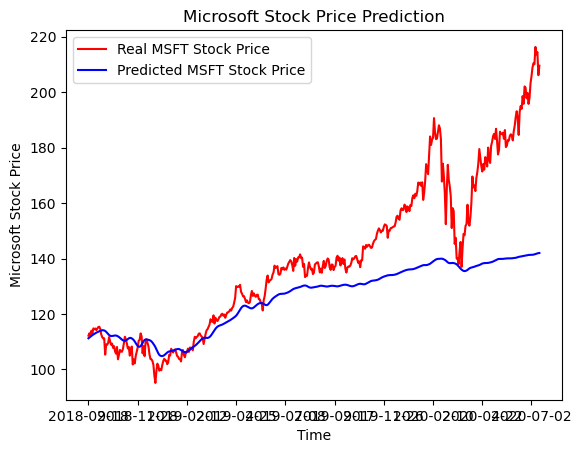

In [20]:
plt.plot(dataSet.loc[800:, 'Date'],dataTest.values, color = 'red', label = 'Real MSFT Stock Price')
plt.plot(dataSet.loc[800:, 'Date'],predicted_price, color = 'blue', label = 'Predicted MSFT Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()